In [9]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings


In [6]:
# Load data
path = "/content/drive/MyDrive/kovai.co dataset/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv"
df = pd.read_csv(path)

# Parse date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date']).sort_values('Date')
df.set_index('Date', inplace=True)

# Ensure numeric
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df = df.fillna(method='ffill')  # small forward fill if needed

services = df.columns.tolist()
df.head()


,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN


In [7]:
def evaluate(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape



Processing service: Local Route
BEST ORDER for Local Route: (1, 1, 1)
BEST SEASONAL ORDER: (1, 1, 1, 7)
MAE = 2359.2392159855253, RMSE = 4370.540003286093, MAPE = 15531.128758705558


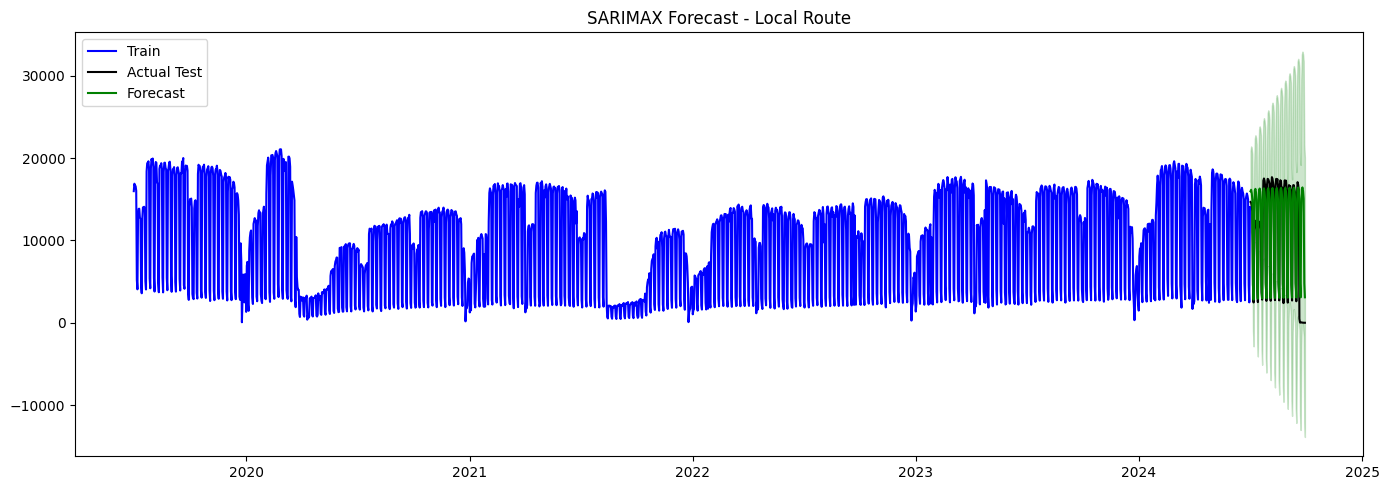


Next 30 days forecast:
2024-07-02    15975.843322
2024-07-03    16154.333906
2024-07-04    15750.148533
2024-07-05    14934.237337
2024-07-06     4623.310899
2024-07-07     2814.874356
2024-07-08    13437.148634
2024-07-09    16065.978119
2024-07-10    16267.929778
2024-07-11    15843.529205
2024-07-12    14929.658113
2024-07-13     4640.600898
2024-07-14     2920.598410
2024-07-15    13271.459375
2024-07-16    16100.743057
2024-07-17    16309.486633
2024-07-18    15879.240956
2024-07-19    14937.037683
2024-07-20     4654.305748
2024-07-21     2959.880785
2024-07-22    13232.241769
2024-07-23    16119.502168
2024-07-24    16330.210148
2024-07-25    15898.273911
2024-07-26    14947.876213
2024-07-27     4666.973719
2024-07-28     2979.946460
2024-07-29    13229.603150
2024-07-30    16133.631967
2024-07-31    16344.908105
Freq: D, Name: predicted_mean, dtype: float64

Processing service: Light Rail
BEST ORDER for Light Rail: (1, 1, 1)
BEST SEASONAL ORDER: (1, 1, 1, 7)
MAE = 1444.821415

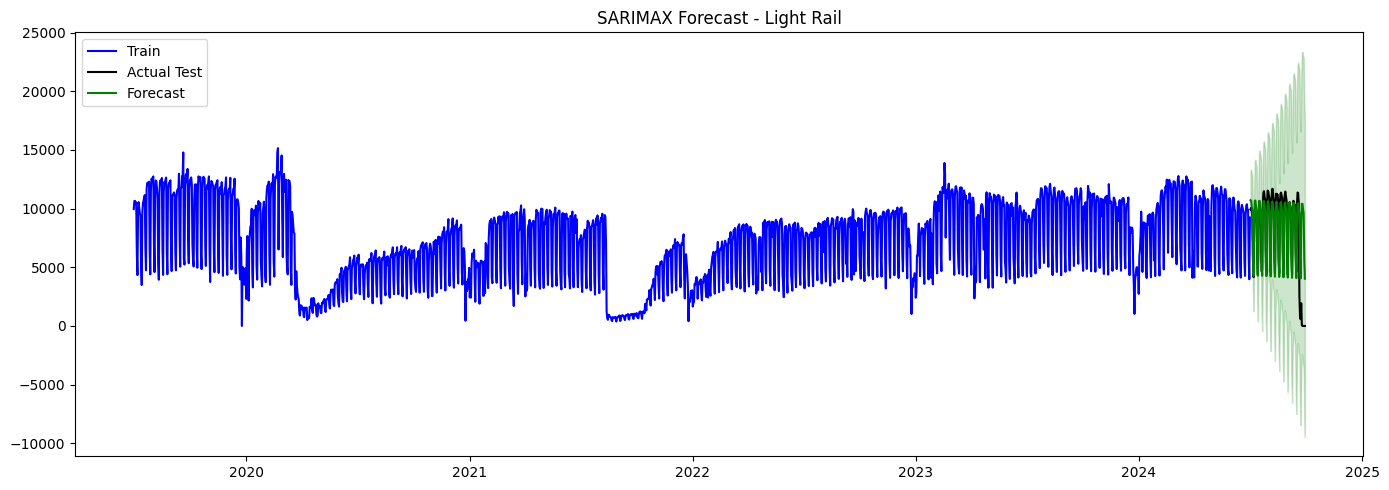


Next 30 days forecast:
2024-07-02    10720.967591
2024-07-03    10682.424186
2024-07-04    10183.958835
2024-07-05     9891.580268
2024-07-06     5932.755964
2024-07-07     4275.426944
2024-07-08     8785.530265
2024-07-09    10681.103465
2024-07-10    10684.229965
2024-07-11    10196.768648
2024-07-12     9869.113838
2024-07-13     5908.260538
2024-07-14     4292.232231
2024-07-15     8704.119367
2024-07-16    10654.436240
2024-07-17    10663.052037
2024-07-18    10177.040253
2024-07-19     9844.739317
2024-07-20     5883.618790
2024-07-21     4273.030127
2024-07-22     8671.981390
2024-07-23    10629.508452
2024-07-24    10638.847234
2024-07-25    10153.026365
2024-07-26     9820.113497
2024-07-27     5858.957774
2024-07-28     4249.085555
2024-07-29     8646.333059
2024-07-30    10604.809761
2024-07-31    10614.243766
Freq: D, Name: predicted_mean, dtype: float64

Processing service: Peak Service
BEST ORDER for Peak Service: (1, 1, 1)
BEST SEASONAL ORDER: (1, 1, 1, 7)
MAE = 35.0862

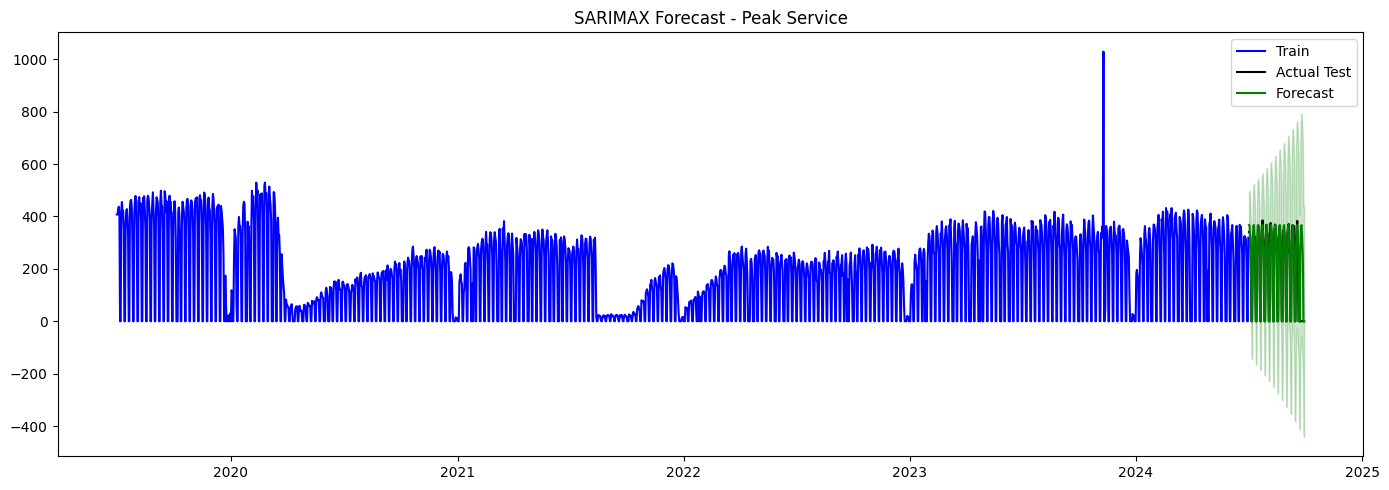


Next 30 days forecast:
2024-07-02    367.351330
2024-07-03    362.948929
2024-07-04    313.815214
2024-07-05    243.041610
2024-07-06     -0.304842
2024-07-07     -0.350545
2024-07-08    287.179177
2024-07-09    364.809865
2024-07-10    366.977404
2024-07-11    312.892718
2024-07-12    244.443358
2024-07-13     -0.454566
2024-07-14     -0.467488
2024-07-15    282.379692
2024-07-16    364.380422
2024-07-17    367.528723
2024-07-18    312.705866
2024-07-19    244.603228
2024-07-20     -0.526073
2024-07-21     -0.534101
2024-07-22    281.614697
2024-07-23    364.267203
2024-07-24    367.561782
2024-07-25    312.628830
2024-07-26    244.577904
2024-07-27     -0.585906
2024-07-28     -0.593204
2024-07-29    281.451432
2024-07-30    364.201149
2024-07-31    367.517545
Freq: D, Name: predicted_mean, dtype: float64

Processing service: Rapid Route
BEST ORDER for Rapid Route: (1, 1, 1)
BEST SEASONAL ORDER: (1, 1, 1, 7)
MAE = 2687.321676507226, RMSE = 5186.687568922905, MAPE = inf


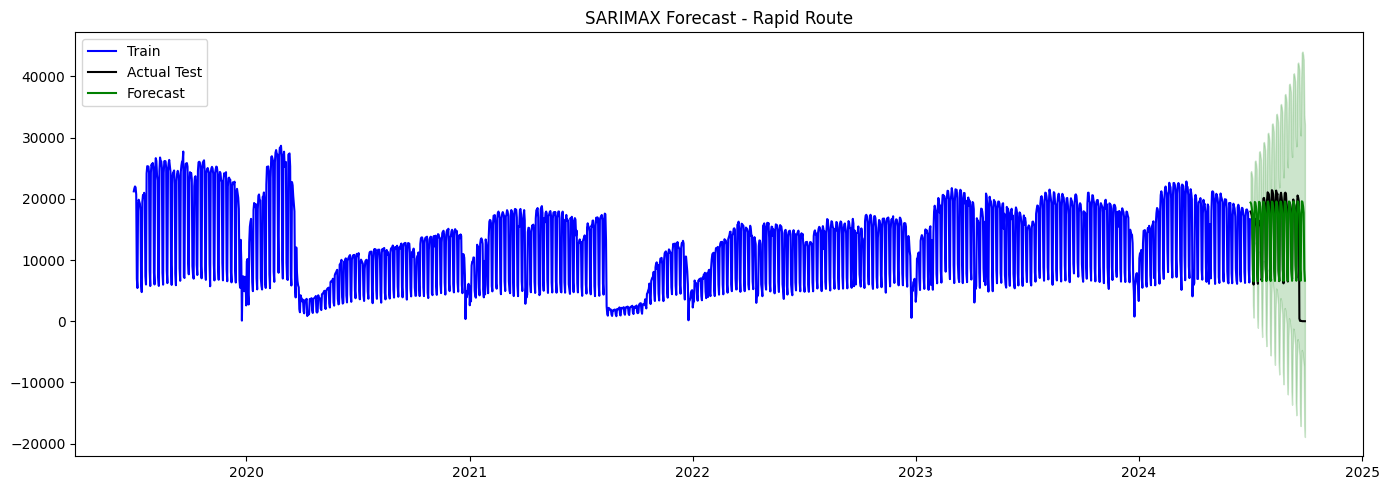


Next 30 days forecast:
2024-07-02    19394.239859
2024-07-03    19202.860766
2024-07-04    18558.045529
2024-07-05    17630.723840
2024-07-06     8397.991323
2024-07-07     6496.219092
2024-07-08    15933.760412
2024-07-09    19496.651432
2024-07-10    19370.230827
2024-07-11    18672.253966
2024-07-12    17630.364104
2024-07-13     8392.523971
2024-07-14     6536.593567
2024-07-15    15783.620579
2024-07-16    19524.293942
2024-07-17    19411.847749
2024-07-18    18702.440926
2024-07-19    17635.915538
2024-07-20     8396.977193
2024-07-21     6550.904301
2024-07-22    15756.964519
2024-07-23    19535.866895
2024-07-24    19426.425658
2024-07-25    18714.561020
2024-07-26    17642.738189
2024-07-27     8403.563692
2024-07-28     6559.610488
2024-07-29    15756.861506
2024-07-30    19543.984369
2024-07-31    19435.189295
Freq: D, Name: predicted_mean, dtype: float64

Processing service: School
BEST ORDER for School: (1, 1, 1)
BEST SEASONAL ORDER: (1, 1, 1, 7)
MAE = 1369.416812393441, 

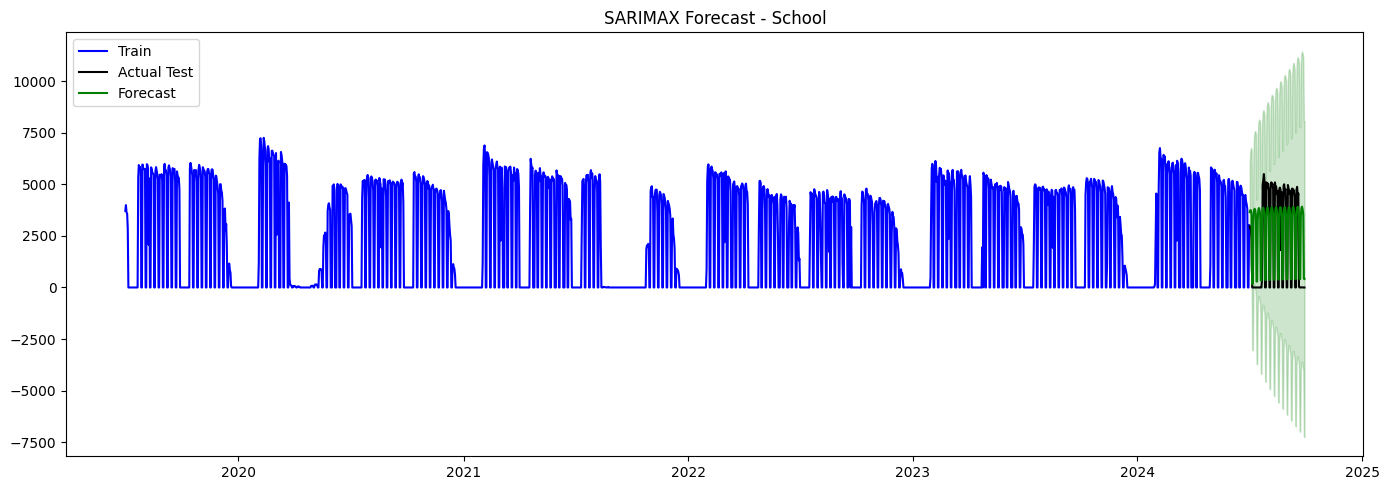


Next 30 days forecast:
2024-07-02    3654.717534
2024-07-03    3749.775931
2024-07-04    3731.849180
2024-07-05    3552.378628
2024-07-06     171.014027
2024-07-07     184.759796
2024-07-08    3202.408058
2024-07-09    3740.059041
2024-07-10    3817.162184
2024-07-11    3735.640536
2024-07-12    3517.087894
2024-07-13     287.266348
2024-07-14     288.545254
2024-07-15    3296.757018
2024-07-16    3785.869675
2024-07-17    3852.238475
2024-07-18    3741.985435
2024-07-19    3505.880619
2024-07-20     339.894808
2024-07-21     335.586480
2024-07-22    3339.628504
2024-07-23    3808.036269
2024-07-24    3869.796330
2024-07-25    3747.312970
2024-07-26    3503.738152
2024-07-27     364.856309
2024-07-28     358.170298
2024-07-29    3360.438759
2024-07-30    3820.051284
2024-07-31    3879.853124
Freq: D, Name: predicted_mean, dtype: float64

Processing service: Other
BEST ORDER for Other: (1, 0, 1)
BEST SEASONAL ORDER: (0, 1, 1, 7)
MAE = 14.344057609837593, RMSE = 23.333354692271183, MAPE

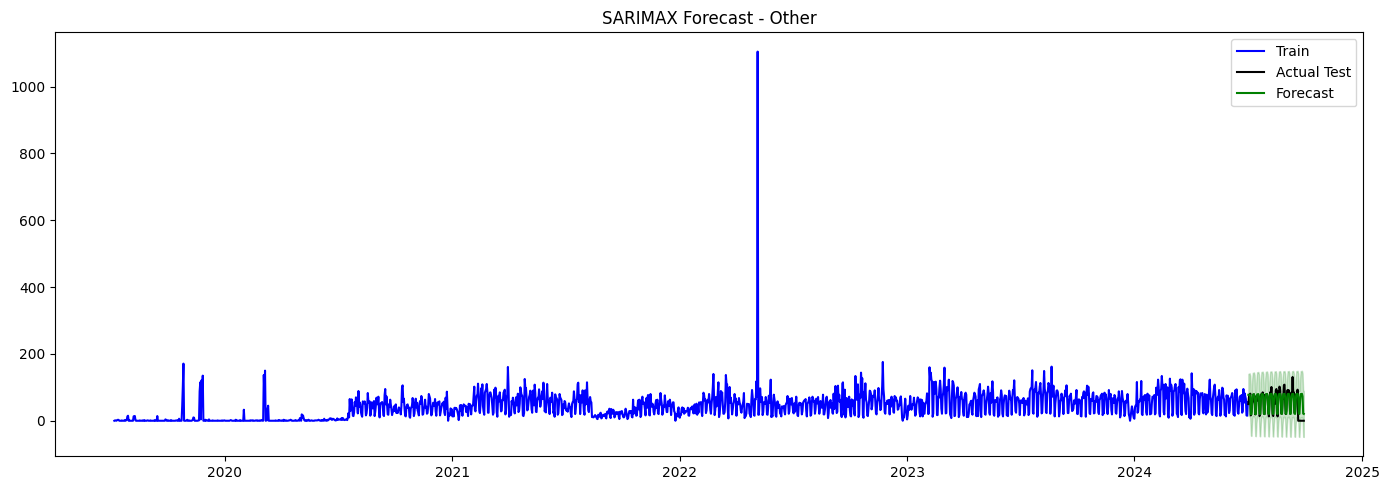


Next 30 days forecast:
2024-07-02    77.623497
2024-07-03    77.454166
2024-07-04    78.736528
2024-07-05    71.163500
2024-07-06    19.705028
2024-07-07    18.833815
2024-07-08    57.757272
2024-07-09    78.453637
2024-07-10    78.230755
2024-07-11    79.463019
2024-07-12    71.843127
2024-07-13    20.340813
2024-07-14    19.428587
2024-07-15    58.313675
2024-07-16    78.974148
2024-07-17    78.717688
2024-07-18    79.918542
2024-07-19    72.269264
2024-07-20    20.739461
2024-07-21    19.801518
2024-07-22    58.662550
2024-07-23    79.300516
2024-07-24    79.023003
2024-07-25    80.204161
2024-07-26    72.536459
2024-07-27    20.989419
2024-07-28    20.035352
2024-07-29    58.881299
2024-07-30    79.505155
2024-07-31    79.214441
Freq: D, Name: predicted_mean, dtype: float64


In [10]:
results_summary = []

for target_service in services:
    print("\n=========================================")
    print(f"Processing service: {target_service}")
    print("=========================================")

    ts = df[target_service].dropna()

    # train-test split
    test_days = 90
    train = ts.iloc[:-test_days]
    test = ts.iloc[-test_days:]

    # SARIMAX order search
    p = d = q = [0,1]
    P = D = Q = [0,1]
    seasonal_period = 7

    best_aic = np.inf
    best_order = None
    best_seasonal = None

    for order in itertools.product(p,d,q):
        for seasonal in itertools.product(P,D,Q):
            seasonal_order = (seasonal[0], seasonal[1], seasonal[2], seasonal_period)
            try:
                model = SARIMAX(train,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                res = model.fit(disp=False)
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_order = order
                    best_seasonal = seasonal_order
            except:
                pass

    print(f"BEST ORDER for {target_service}: {best_order}")
    print(f"BEST SEASONAL ORDER: {best_seasonal}")

    # fit final model
    model = SARIMAX(train,
                    order=best_order,
                    seasonal_order=best_seasonal,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    result = model.fit(disp=False)

    # forecast last 90 days (test set)
    forecast = result.get_forecast(steps=test_days)
    forecast_values = forecast.predicted_mean
    ci = forecast.conf_int()

    # evaluate
    mae, rmse, mape = evaluate(test, forecast_values)
    print(f"MAE = {mae}, RMSE = {rmse}, MAPE = {mape}")

    # save results
    results_summary.append({
        "service": target_service,
        "order": best_order,
        "seasonal_order": best_seasonal,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape
    })

    # plot
    plt.figure(figsize=(14,5))
    plt.plot(train.index, train, label='Train', color='blue')
    plt.plot(test.index, test, label='Actual Test', color='black')
    plt.plot(forecast_values.index, forecast_values, label='Forecast', color='green')
    plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='green', alpha=0.2)
    plt.title(f"SARIMAX Forecast - {target_service}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # next 30 days forecast
    future_steps = 30
    future = result.get_forecast(steps=future_steps)
    future_pred = future.predicted_mean

    print("\nNext 30 days forecast:")
    print(future_pred)


In [11]:
summary_df = pd.DataFrame(results_summary)
summary_df


,service,order,seasonal_order,MAE,RMSE,MAPE
0,Local Route,"(1, 1, 1)","(1, 1, 1, 7)",2359.239216,4370.540003,1.553113e+04
1,Light Rail,"(1, 1, 1)","(1, 1, 1, 7)",1444.821416,2670.020904,inf
2,Peak Service,"(1, 1, 1)","(1, 1, 1, 7)",35.086229,82.547125,inf
3,Rapid Route,"(1, 1, 1)","(1, 1, 1, 7)",2687.321677,5186.687569,inf
4,School,"(1, 1, 1)","(1, 1, 1, 7)",1369.416812,1791.655298,inf
5,Other,"(1, 0, 1)","(0, 1, 1, 7)",14.344058,23.333355,inf
